In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import statsmodels.api as sm
import os
plt.style.use('ggplot')

In [2]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [19]:
#import data
df_435 = pd.read_csv('485.csv', sep = ',')
df_435 = df_435.set_index('время')
df_435 = df_435
df_435

,газ,масла,смолы,асфальтены,кокс
время,,,,,
0,0.00,0.55,0.37,0.09,0.00
30,0.20,0.30,0.15,0.03,0.32
60,0.29,0.22,0.06,0.10,0.42
90,0.32,0.18,0.04,0.10,0.45
120,0.32,0.43,0.02,0.10,0.23


<AxesSubplot:xlabel='время'>

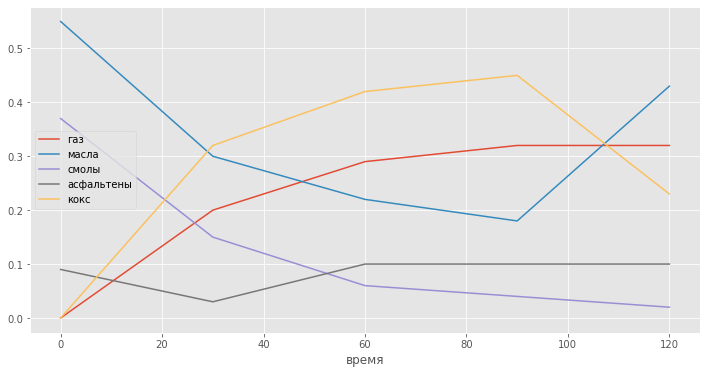

In [20]:
df_435.plot(figsize=(12,6))

In [21]:
ar1 = pd.DataFrame({'Masla_Yt': df_435['масла'], 'Smol_Yt':df_435['смолы'], 'Asvalten_Yt': df_435['асфальтены'], 'Gaz_Yt':df_435['газ'], 'Koks_Yt': df_435['кокс']})
ar1= ar1
ar1

,Masla_Yt,Smol_Yt,Asvalten_Yt,Gaz_Yt,Koks_Yt
время,,,,,
0,0.55,0.37,0.09,0.00,0.00
30,0.30,0.15,0.03,0.20,0.32
60,0.22,0.06,0.10,0.29,0.42
90,0.18,0.04,0.10,0.32,0.45
120,0.43,0.02,0.10,0.32,0.23


### 1) ARIMA для масла

In [22]:
src_data_model =ar1['Masla_Yt']
model1 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model1.summary())

                               SARIMAX Results                                
Dep. Variable:               Masla_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   2.848
Date:                Wed, 11 Jan 2023   AIC                              0.305
Time:                        21:48:56   BIC                             -0.867
Sample:                             0   HQIC                            -2.840
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3358      0.600      0.559      0.576      -0.841       1.512
ar.L1         -0.0025      7.096     -0.000      1.000     -13.910      13.905
sigma2         0.0187      0.178      0.106      0.9

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 2) ARIMA для смолы

In [23]:
src_data_model = ar1['Smol_Yt']
model2 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model2.summary())

                               SARIMAX Results                                
Dep. Variable:                Smol_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   3.589
Date:                Wed, 11 Jan 2023   AIC                             -1.178
Time:                        21:48:57   BIC                             -2.350
Sample:                             0   HQIC                            -4.323
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1535      0.675      0.227      0.820      -1.170       1.477
ar.L1          0.6074      1.983      0.306      0.759      -3.279       4.493
sigma2         0.0127      0.091      0.140      0.8

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 3) ARIMA для асфальтены

In [24]:
src_data_model = ar1['Asvalten_Yt']
model3 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model3.summary())

                               SARIMAX Results                                
Dep. Variable:            Asvalten_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  10.991
Date:                Wed, 11 Jan 2023   AIC                            -15.982
Time:                        21:48:58   BIC                            -17.153
Sample:                             0   HQIC                           -19.126
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0833      0.045      1.860      0.063      -0.004       0.171
ar.L1         -0.1665      1.712     -0.097      0.923      -3.521       3.188
sigma2         0.0007      0.002      0.431      0.6

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 4) ARIMA для кокса

In [25]:
src_data_model = ar1['Koks_Yt']
model4 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model4.summary())

                               SARIMAX Results                                
Dep. Variable:                Koks_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   2.037
Date:                Wed, 11 Jan 2023   AIC                              1.926
Time:                        21:48:58   BIC                              0.754
Sample:                             0   HQIC                            -1.219
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2724      0.159      1.709      0.088      -0.040       0.585
ar.L1          0.1553      1.089      0.143      0.887      -1.980       2.290
sigma2         0.0258      0.057      0.452      0.6

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 5) ARIMA для газ

In [26]:
src_data_model = ar1['Gaz_Yt']
model5 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model5.summary())

                               SARIMAX Results                                
Dep. Variable:                 Gaz_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   3.969
Date:                Wed, 11 Jan 2023   AIC                             -1.939
Time:                        21:48:59   BIC                             -3.111
Sample:                             0   HQIC                            -5.084
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.430      0.464      0.643      -0.644       1.043
ar.L1          0.6260      1.398      0.448      0.654      -2.113       3.365
sigma2         0.0108      0.054      0.201      0.8

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Константы

In [28]:
# c = 0.5310, 0.1491, 0.0800
# c = pd.DataFrame(c)
c = pd.DataFrame({'Masla_Yt' :  0.3358 , 'Smol_Yt': 0.1535 , 'Asvalten_Yt': 0.0833,'Koks_Yt': 0.2724, 'Gaz_Yt': 0.1995  }, index = [0])
c

,Masla_Yt,Smol_Yt,Asvalten_Yt,Koks_Yt,Gaz_Yt
0,0.3358,0.1535,0.0833,0.2724,0.1995


### Предсказания для моделей ARIMA(масла, смолы, асфальтен, кокс)

In [29]:
predict1 = model1.predict(n_periods=7)
predict1 = predict1.values
predict2 = model2.predict(n_periods=7)
predict2 = predict2.values
predict3 = model3.predict(n_periods=7)
predict3 = predict3.values
predict4 = model4.predict(n_periods=7)
predict4 = predict4.values
predict5 = model5.predict(n_periods=7)
predict5 = predict5.values
ar2 = pd.DataFrame({'Masla_Yt': predict1, 'Smol_Yt':predict2, 'Asvalten_Yt': predict3, 'Koks_Yt': predict4,'Gaz_Yt':predict5 },index = [150,180,210,240,270] )
ar2

,Masla_Yt,Smol_Yt,Asvalten_Yt,Koks_Yt,Gaz_Yt
150,0.335841,0.153533,0.083329,0.272419,0.199528
180,0.335303,0.285023,0.082219,0.230115,0.074621
210,0.335931,0.151387,0.092209,0.279808,0.199823
240,0.336131,0.096717,0.080554,0.295337,0.256164
270,0.336232,0.084569,0.080554,0.299996,0.274945


<AxesSubplot:>

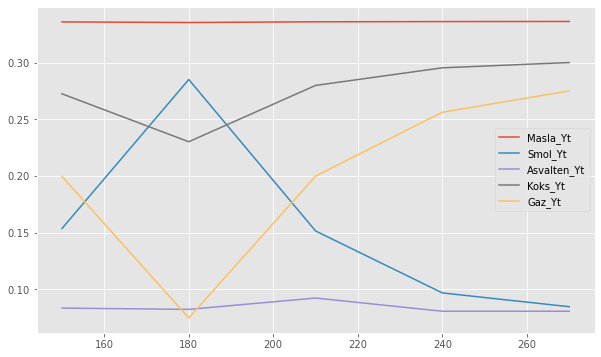

In [30]:
ar2.plot(figsize=(10,6))

## 1) Реализация уравнения для Газа

In [31]:
Gaz_Yt = (ar2['Masla_Yt']**(1.6)) + (ar2['Smol_Yt']**(1.6)) +(ar2['Asvalten_Yt']**(1.6))
Gaz_Yt
ar_Gaz_Yt = pd.DataFrame({'Masla_Yt': ar2['Masla_Yt'], 'Smol_Yt':ar2['Smol_Yt'], 'Asvalten_Yt': ar2['Asvalten_Yt'], 'Gaz_Yt': Gaz_Yt },index = [150,180,210,240,270] )
ar_Gaz_Yt

,Masla_Yt,Smol_Yt,Asvalten_Yt,Gaz_Yt
150,0.335841,0.153533,0.083329,0.243148
180,0.335303,0.285023,0.082219,0.326641
210,0.335931,0.151387,0.092209,0.245412
240,0.336131,0.096717,0.080554,0.216334
270,0.336232,0.084569,0.080554,0.211815


<AxesSubplot:>

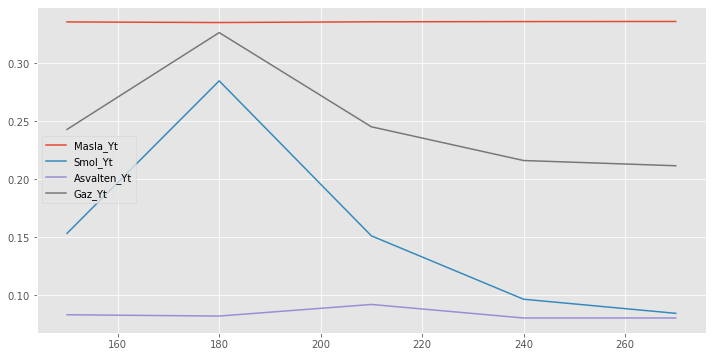

In [32]:
ar_Gaz_Yt.plot(figsize=(12,6))

### Тесты модели Газа

In [33]:
sigma = mean_squared_error(ar1['Gaz_Yt'],ar_Gaz_Yt['Gaz_Yt'])

absolute_error = mean_absolute_error(ar1['Gaz_Yt'], ar_Gaz_Yt['Gaz_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Gaz_Yt'].values
z = ar_Gaz_Yt['Gaz_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.019919604947868617
АО : 0.1252458196875961
Стандарт.относит.откл. : 10.07325327690196


## 2) Реализация уравнения для Асфалтена

In [47]:
Asv_Yt = (ar2['Masla_Yt']**(1.6)) + (ar2['Smol_Yt']**(1.6))

ar_Asv_Yt = pd.DataFrame({'Masla_Yt': predict1, 'Smol_Yt':predict2, 'Asvalten_Yt': Asv_Yt},index = [150,180,210,240,270] )
ar_Asv_Yt

,Masla_Yt,Smol_Yt,Asvalten_Yt
150,0.335841,0.153533,0.224387
180,0.335303,0.285023,0.308278
210,0.335931,0.151387,0.223351
240,0.336131,0.096717,0.198562
270,0.336232,0.084569,0.194043


<AxesSubplot:>

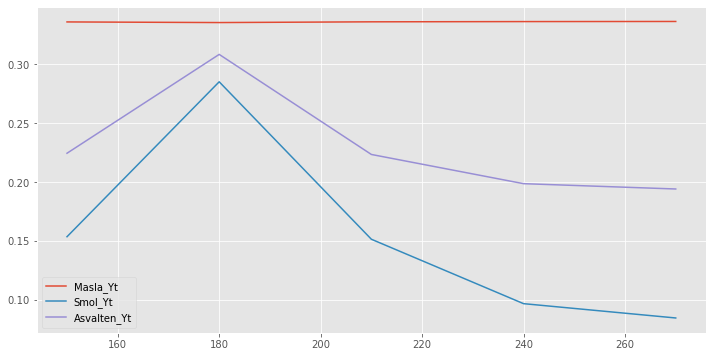

In [48]:
ar_Asv_Yt.plot(figsize=(12,6))

### Тесты модели Асфалтена

In [49]:
sigma = mean_squared_error(ar1['Asvalten_Yt'],ar_Asv_Yt['Asvalten_Yt'])

absolute_error = mean_absolute_error(ar1['Asvalten_Yt'], ar_Asv_Yt['Asvalten_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Asvalten_Yt'].values
z = ar_Asv_Yt['Asvalten_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.025854418785964006
АО : 0.1457238663044303
Стандарт.относит.откл. : 12.686872169504312


## 3) Реализация уравнения для Кокс

In [50]:
Koks_Yt = (ar2['Asvalten_Yt']**(1)) + (ar2['Gaz_Yt']**(1))

ar_Koks_Yt = pd.DataFrame({'Koks_Yt': Koks_Yt, 'Asvalten_Yt' : ar2['Asvalten_Yt']},index = [150,180,210,240,270] )
ar_Koks_Yt

,Koks_Yt,Asvalten_Yt
150,0.282857,0.083329
180,0.156840,0.082219
210,0.292033,0.092209
240,0.336718,0.080554
270,0.355498,0.080554


<AxesSubplot:>

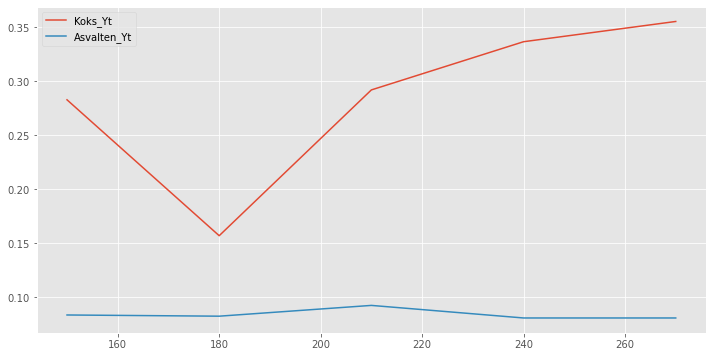

In [51]:
ar_Koks_Yt.plot(figsize=(12,6))

### Тесты модели Кокс

In [52]:
sigma = mean_squared_error(ar1['Koks_Yt'],ar_Koks_Yt['Koks_Yt'])

absolute_error = mean_absolute_error(ar1['Koks_Yt'], ar_Koks_Yt['Koks_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Koks_Yt'].values
z = ar_Koks_Yt['Koks_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.03031755005924408
АО : 0.16255305666160483
Стандарт.относит.откл. : 11.415679316788898


## 4) Реализация уравнения для Масла

In [59]:
Masla_Yt = ((ar2['Asvalten_Yt'])**(1)) + ((ar2['Smol_Yt'])**(1))
Masla_Yt
ar_Masla_Yt = pd.DataFrame({'Masla_Yt': Masla_Yt,'Asvalten_Yt' : ar2['Asvalten_Yt'],'Smol_Yt' :ar2['Smol_Yt'] },index = [150,180,210,240,270] )
ar_Masla_Yt

,Masla_Yt,Asvalten_Yt,Smol_Yt
150,0.236862,0.083329,0.153533
180,0.367242,0.082219,0.285023
210,0.243596,0.092209,0.151387
240,0.177271,0.080554,0.096717
270,0.165122,0.080554,0.084569


<AxesSubplot:>

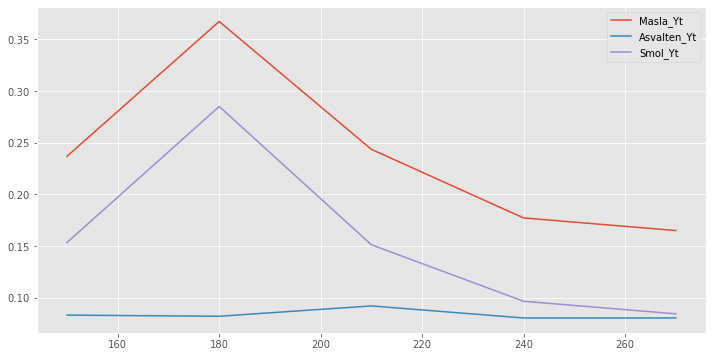

In [60]:
ar_Masla_Yt.plot(figsize=(12,6))

### Тест Масла

In [61]:
sigma = mean_squared_error(ar1['Masla_Yt'],ar_Masla_Yt['Masla_Yt'])

absolute_error = mean_absolute_error(ar1['Masla_Yt'], ar_Masla_Yt['Masla_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Masla_Yt'].values
z = ar_Masla_Yt['Masla_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.034660282705550216
АО : 0.13431659997896056
Стандарт.относит.откл. : 11.286228470771842


## 5) Реализация уравнения для Смолы

In [68]:
Smol_Yt = ((ar2['Masla_Yt'])**(1)) + ((ar2['Asvalten_Yt'])**(1))
Smol_Yt
ar_Smol_Yt = pd.DataFrame({'Masla_Yt': Masla_Yt,'Asvalten_Yt' : ar2['Asvalten_Yt'],'Smol_Yt' :Smol_Yt },index = [150,180,210,240,270] )
ar_Smol_Yt

,Masla_Yt,Asvalten_Yt,Smol_Yt
150,0.236862,0.083329,0.419170
180,0.367242,0.082219,0.417522
210,0.243596,0.092209,0.428140
240,0.177271,0.080554,0.416685
270,0.165122,0.080554,0.416785


<AxesSubplot:>

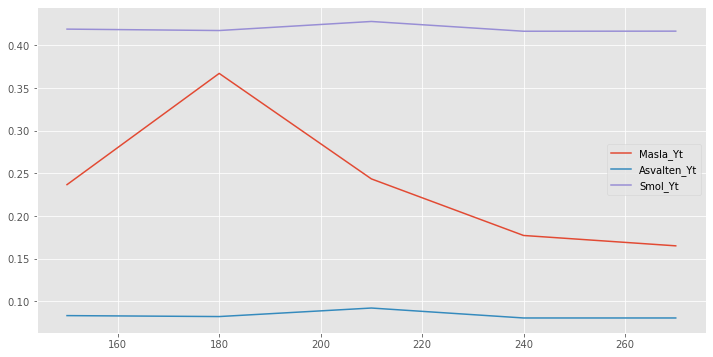

In [69]:
ar_Smol_Yt.plot(figsize=(12,6))

### Тест Смолы

In [70]:
sigma = mean_squared_error(ar1['Smol_Yt'],ar_Smol_Yt['Smol_Yt'])

absolute_error = mean_absolute_error(ar1['Smol_Yt'], ar_Smol_Yt['Smol_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Smol_Yt'].values
z = ar_Smol_Yt['Smol_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.10176855779669196
АО : 0.29166041899415557
Стандарт.относит.откл. : 13.899829757269409


## Общий график реакций

<AxesSubplot:>

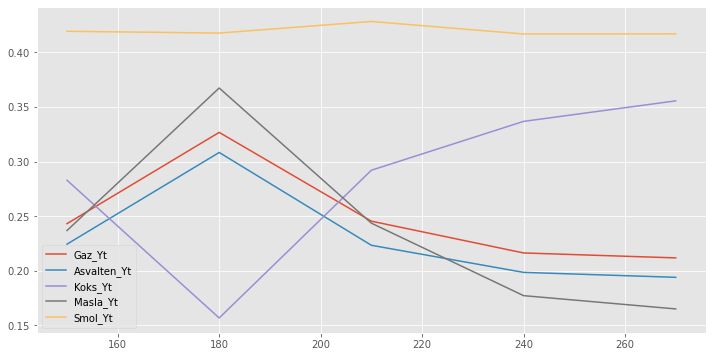

In [71]:
reakcia = pd.DataFrame({'Gaz_Yt':ar_Gaz_Yt['Gaz_Yt'], 'Asvalten_Yt': ar_Asv_Yt['Asvalten_Yt'],'Koks_Yt' :ar_Koks_Yt['Koks_Yt'],
                       'Masla_Yt': ar_Masla_Yt['Masla_Yt'],'Smol_Yt': ar_Smol_Yt['Smol_Yt'] })
reakcia.plot(figsize=(12,6))